In [1]:
import gym
import collections

In [3]:
ENV_NAME = "FrozenLake-v0"
GAMMA = 0.9
ALPHA = 0.2
TEST_EPISODES = 20

In [6]:
class Agent:
    
    def __init__(self):
        self.env = gym.make(ENV_NAME)
        self.state = self.env.reset()
        self.values = collections.defaultdict(float)
        
    def sample_env(self):
        action = self.env.action_space.sample()
        old_state = self.state
        new_state, reward, is_done, _ = self.env.step(action)
        self.state = self.env.reset() if is_done else new_state 
        return old_state, action, reward, new_state

    def best_value_and_action(self, state):
        best_value, best_action = None, None
        for action in range(self.env.action_space.n):
            action_value = self.values[(state, action)]
            if best_value is None or best_value < action_value:
                best_value = action_value
                best_action = action
        return best_value, best_action
    
    def value_update(self, s, a, r, next_s):
        best_v, _ = self.best_value_and_action(next_s)
        new_v = r + GAMMA * best_v
        old_v = self.values[(s, a)]
        self.values[(s, a)] = old_v * (1-ALPHA) + new_v * ALPHA
    
    def play_episode(self, env):
        total_rew = 0.0
        state = env.reset()
        while True:
            _, action = self.best_value_and_action(state)
            new_state, reward, is_done, _ = env.step(action)
            total_rew += reward
            if is_done:
                break
            state = new_state
        return total_rew
    

In [7]:
if __name__ == "__main__":
    test_env = gym.make(ENV_NAME)
    agent = Agent()
    iter_no = 0
    best_reward = 0.0
    rewards = []
    while True:
        iter_no += 1
        s, a, r, next_s = agent.sample_env()
        agent.value_update(s, a, r, next_s)
        
        reward = 0.0
        for _ in range(TEST_EPISODES):
            reward += agent.play_episode(test_env)
        reward /= TEST_EPISODES
        rewards.append(reward)
        if reward > best_reward:
            print("Best reward updated %.3f -> %.3f" % (best_reward, reward))
            best_reward = reward
        if reward > 0.8:
            print("Solved in %d iterations!" % iter_no)
            break
        

Best reward updated 0.000 -> 0.050
Best reward updated 0.050 -> 0.150
Best reward updated 0.150 -> 0.200
Best reward updated 0.200 -> 0.250
Best reward updated 0.250 -> 0.300
Best reward updated 0.300 -> 0.400
Best reward updated 0.400 -> 0.500
Best reward updated 0.500 -> 0.550
Best reward updated 0.550 -> 0.600
Best reward updated 0.600 -> 0.800
Best reward updated 0.800 -> 0.850
Solved in 13089 iterations!


In [8]:
import matplotlib.pyplot as plt

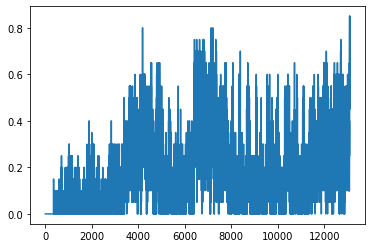

In [9]:
plt.plot(rewards)